In [1]:

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y

!pip install tensorflow==2.3.0
!pip install keras==2.4

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
#from keras.preprocessing.image import ImageDataGenerator

#dl libraraies


Found existing installation: Keras 2.4.0
Uninstalling Keras-2.4.0:
  Successfully uninstalled Keras-2.4.0


Found existing installation: Keras-Preprocessing 1.1.2
Uninstalling Keras-Preprocessing-1.1.2:
  Successfully uninstalled Keras-Preprocessing-1.1.2


Found existing installation: tensorflow 2.3.0
Uninstalling tensorflow-2.3.0:
  Successfully uninstalled tensorflow-2.3.0


  Using cached tensorflow-2.3.0-cp37-cp37m-win_amd64.whl (342.5 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.8.0 requires keras<2.9,>=2.8.0rc0, which is not installed.
tensorflow-gpu 2.8.0 requires numpy>=1.20, but you have numpy 1.18.5 which is incompatible.


  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.8.0 requires keras<2.9,>=2.8.0rc0, but you have keras 2.4.0 which is incompatible.
tensorflow-gpu 2.8.0 requires numpy>=1.20, but you have numpy 1.18.5 which is incompatible.


  Using cached Keras-2.4.0-py2.py3-none-any.whl (170 kB)


In [2]:
    #from keras import backend as K
    #from keras.models import Sequential
    #from keras.layers import Dense
    #from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
    #from keras.utils import to_categorical

    # specifically for cnn
    #from keras.layers import Dropout, Flatten,Activation
    #from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

    import tensorflow as tf
    import random as rn

    # specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
    import cv2                  
    import numpy as np  
    from tqdm import tqdm
    import os                   
    from random import shuffle  
    from zipfile import ZipFile
    from PIL import Image

In [3]:
X=[]
Z=[]
IMG_SIZE=150
FREE_DIR='C:\\Users\\USER\\Desktop\\archive\\data\\data\\Free'
FULL_DIR='C:\\Users\\USER\\Desktop\\archive\\data\\data\\Full'

In [4]:
def assign_label(img,label):
    return label

In [5]:
def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,label)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [6]:
# make 'Free' data
make_train_data('Free',FREE_DIR)

100%|██████████████████████████████████████████████████████████████████████████████| 1067/1067 [00:28<00:00, 37.89it/s]


In [7]:
# make 'Full' data
make_train_data('Full',FULL_DIR)

100%|██████████████████████████████████████████████████████████████████████████████| 2195/2195 [01:05<00:00, 33.42it/s]


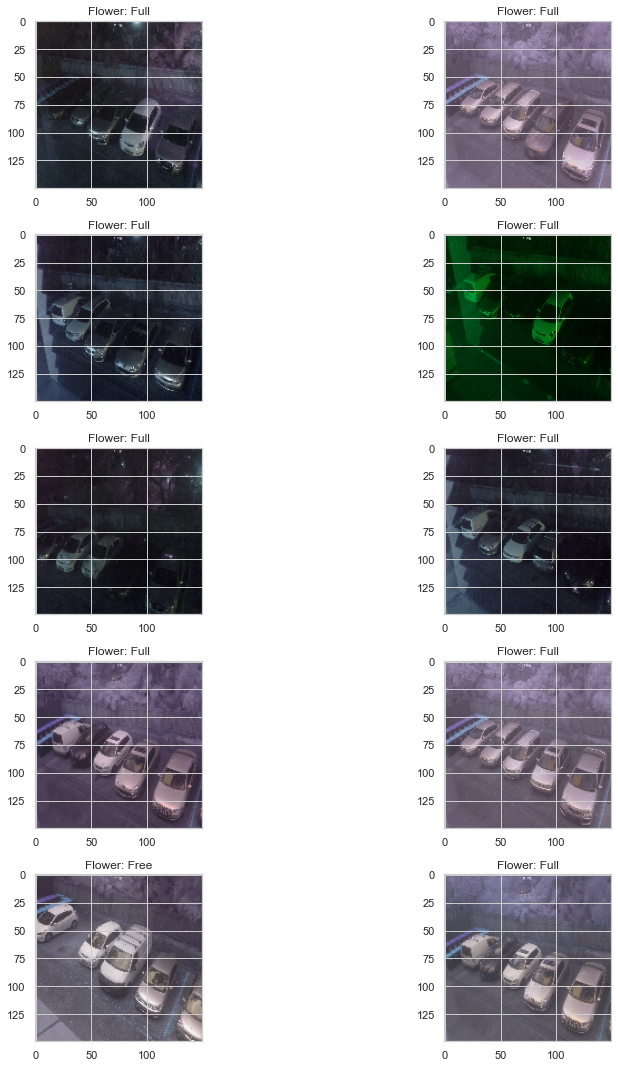

In [8]:
# check some image
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

In [9]:
from tensorflow.keras.utils import to_categorical


le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,2)
X=np.array(X)
X=X/255

In [10]:
# separate data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [11]:
#?????????????????????????
import tensorflow.keras as tf

print(tf.__version__)

2.4.0


In [12]:
# fix random seed
import tensorflow.keras as tf
np.random.seed(42)
tf.seed = np.random.seed(42)

In [13]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

In [14]:
# # modelling starts using a CNN.
from tensorflow import keras
from tensorflow.python.keras.layers import Dropout, Flatten,Activation
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
model = keras.Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(2, activation = "softmax"))

In [15]:
batch_size=128
epochs= 100

# use callback only ReduceLROnPlateau
from tensorflow.python.keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [16]:
# data augmentation to prevent overfitting

from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [17]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 96)        8

In [19]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
19/19 [==============================] - 76s 4s/step - loss: 0.6564 - accuracy: 0.6890 - val_loss: 0.6179 - val_accuracy: 0.6324
Epoch 2/100
19/19 [==============================] - 34s 2s/step - loss: 0.5700 - accuracy: 0.7058 - val_loss: 0.5968 - val_accuracy: 0.6360
Epoch 3/100
19/19 [==============================] - 12s 651ms/step - loss: 0.5532 - accuracy: 0.7066 - val_loss: 0.5448 - val_accuracy: 0.7672
Epoch 4/100
19/19 [==============================] - 15s 800ms/step - loss: 0.5818 - accuracy: 0.6519 - val_loss: 0.5602 - val_accuracy: 0.6324
Epoch 5/100
19/19 [==============================] - 15s 794ms/step - loss: 0.5337 - accuracy: 0.7209 - val_loss: 0.5240 - val_accuracy: 0.7463
Epoch 6/100
19/19 [==============================] - 14s 741ms/step - loss: 0.4846 - accuracy: 0.7817 - val_loss: 0.5919 - val_accuracy: 0.7267
Epoch 7/100
19/19 [==============================] - 16s 821ms/ste

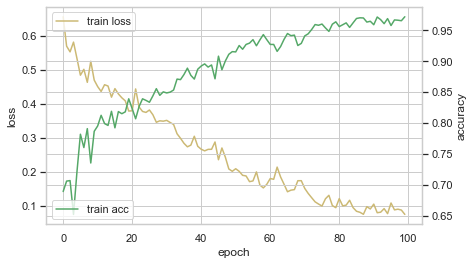

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(History.history['loss'],'y',label='train loss')

acc_ax.plot(History.history['accuracy'],'g',label='train acc')


loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

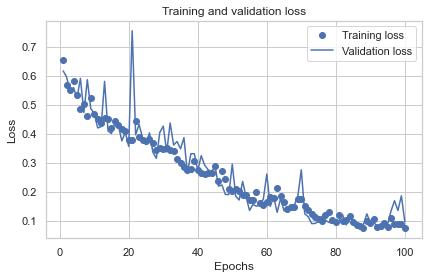

In [21]:
import matplotlib.pyplot as plt

history_dict = History.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  # ‘bo’는 파란색 점을 의미합니다.
plt.plot(epochs, val_loss, 'b', label='Validation loss') # ‘b’는 파란색 실선을 의미합니다.
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

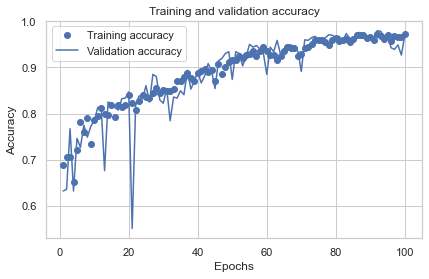

In [22]:
plt.clf() # 그래프를 초기화합니다.
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [23]:
!pip install --quiet --upgrade tensorflow-federated
!pip install --quiet --upgrade nest-asyncio


In [24]:
import nest_asyncio
nest_asyncio.apply()

In [25]:
%load_ext tensorboard

In [26]:
import collections

import numpy as np
import tensorflow as tf
import tensorflow_federated as tff

np.random.seed(0)

tff.federated_computation(lambda: 'Hello, World!')()

b'Hello, World!'

In [28]:
client_ids = ['a','b','c','d','e']

In [29]:
NUM_CLIENTS = 5
NUM_EPOCHS = 5
BATCH_SIZE = 20
SHUFFLE_BUFFER = 100
PREFETCH_BUFFER = 10

def preprocess(dataset):

  def batch_format_fn(element):
    """Flatten a batch `pixels` and return the features as an `OrderedDict`."""
    return collections.OrderedDict(
        x=tf.reshape(element['pixels'], [-1, 150]),
        y=tf.reshape(element['label'], [-1, 1]))

  return dataset.repeat(NUM_EPOCHS).shuffle(SHUFFLE_BUFFER, seed=1).batch(
      BATCH_SIZE).map(batch_format_fn).prefetch(PREFETCH_BUFFER)

In [30]:
x_train.element_type_structure

AttributeError: 'numpy.ndarray' object has no attribute 'element_type_structure'

In [ ]:
preprocessed_example_dataset = preprocess(example_dataset)

sample_batch = tf.nest.map_structure(lambda x: x.numpy(),
                                     next(iter(preprocessed_example_dataset)))

sample_batch

In [27]:
def create_keras_model():
    model = keras.Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))


    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


    model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(2, activation = "softmax"))
    
    return model